<a href="https://colab.research.google.com/github/alaka2019/Trips/blob/main/Trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR: ALAKA JAYAN**


DATA SOURCE: [Cycle Share Dataset](https://www.kaggle.com/pronto/cycle-share-dataset)

Data Preprocessing done with Excel

Importing all Libraries required

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np

In [2]:
#Uploading the input CSV file
from google.colab import files
uploaded = files.upload()

Saving tripdata.csv to tripdata.csv


In [3]:
#Reading the CSV file
trip = pd.read_csv("tripdata.csv")

In [4]:
#Dimension of the dataframe
trip.shape

(286858, 12)

In [5]:
#First 5 rows of the dataframe
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,13/10/2014 10:31,13/10/2014 10:48,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,13/10/2014 10:32,13/10/2014 10:48,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,13/10/2014 10:33,13/10/2014 10:48,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,13/10/2014 10:34,13/10/2014 10:48,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,13/10/2014 10:34,13/10/2014 10:49,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [6]:
trip.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [7]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286857 non-null  object 
 10  gender             181557 non-null  object 
 11  birthyear          181553 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [8]:
trip['starttime'] = pd.to_datetime(trip['starttime'])
trip['stoptime'] = pd.to_datetime(trip['stoptime'])

In [9]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   stoptime           286858 non-null  datetime64[ns]
 3   bikeid             286858 non-null  object        
 4   tripduration       286858 non-null  float64       
 5   from_station_name  286858 non-null  object        
 6   to_station_name    286858 non-null  object        
 7   from_station_id    286858 non-null  object        
 8   to_station_id      286858 non-null  object        
 9   usertype           286857 non-null  object        
 10  gender             181557 non-null  object        
 11  birthyear          181553 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 26.3+ MB


In [10]:
#Checking for duplicated rows
trip[trip.duplicated()].shape

(50792, 12)

In [11]:
#Removing duplicated rows
trip.drop_duplicates(subset = list(trip), keep = 'first', inplace = True)

In [12]:
#Dimension of dataframe after removing duplicated rows
trip.shape

(236066, 12)

In [13]:
trip[trip.duplicated()].shape

(0, 12)

In [14]:
trip.describe()

,trip_id,tripduration,birthyear
count,236066.000000,236066.000000,146167.000000
mean,130059.568316,1202.683823,1979.879740
std,72842.281820,2066.709360,10.154978
min,431.000000,60.010000,1931.000000
25%,67745.250000,392.270000,1975.000000
50%,130525.500000,633.240000,1983.000000
75%,192899.750000,1145.027500,1987.000000
max,255245.000000,28794.400000,1999.000000


In [15]:
#Converting birthyear column to Integer from Float 
trip['birthyear'] = trip['birthyear'].astype(float).astype('Int64')
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [16]:
#Creating a new column Age from Birthyear
trip['age'] = 2016 - trip['birthyear']
trip.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960,56
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970,46
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988,28
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977,39
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971,45


In [17]:
#Deleting the birthyear column
trip.drop('birthyear', axis=1, inplace=True)

In [18]:
#The unique station IDs from where trips began
trip['from_station_id'].value_counts()

WF-01            11274
CH-07             9466
BT-01             9392
CBD-13            8198
SLU-15            8188
                 ...  
UW-01              480
WF-03              160
Pronto shop 2        2
8D OPS 02            2
Pronto shop          1
Name: from_station_id, Length: 61, dtype: int64

In [19]:
#The unique station IDs where trips ended
trip['to_station_id'].value_counts()

WF-01            11768
CBD-13           11408
BT-01             9202
SLU-15            9010
SLU-07            8469
                 ...  
UW-01              449
WF-03              167
Pronto shop         13
Pronto shop 2        5
8D OPS 02            2
Name: to_station_id, Length: 61, dtype: int64

In [20]:
user_type = trip.groupby('usertype', as_index=False).size()

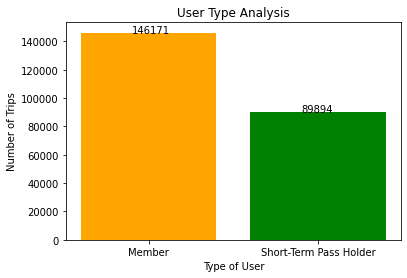

In [21]:
#Analysing number of trips by type of user
bars = plt.bar(user_type['usertype'], user_type['size'], width=0.8, color=['orange','g'])
plt.xlabel("Type of User")
plt.ylabel("Number of Trips")
plt.title("User Type Analysis")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.3, yval+1, yval, fontsize=10)
plt.show()

In [22]:
#Top 20 stations from where longest 2000 trip began
sorted_trip = trip.sort_values(by='tripduration', ascending=False)
sorted_trip = sorted_trip.iloc[:2000, [0,4,5,6,7,8]]
sorted_trip.groupby('from_station_name').size().sort_values(ascending=False).head(20)

from_station_name
Pier 69 / Alaskan Way & Clay St                         135
Seattle Aquarium / Alaskan Way S & Elliott Bay Trail    103
2nd Ave & Pine St                                        82
Burke-Gilman Trail / NE Blakeley St & 24th Ave NE        81
3rd Ave & Broad St                                       70
1st Ave & Marion St                                      69
Westlake Ave & 6th Ave                                   65
Dexter Ave & Denny Way                                   58
Key Arena / 1st Ave N & Harrison St                      57
2nd Ave & Vine St                                        56
E Harrison St & Broadway Ave E                           55
2nd Ave & Blanchard St                                   54
Lake Union Park / Valley St & Boren Ave N                50
Pine St & 9th Ave                                        49
12th Ave & NE Campus Pkwy                                49
15th Ave NE & NE 40th St                                 42
6th Ave S & S King St 

In [23]:
#Top 15 stations with the maximum number of trips beginning there
stations_start=trip.groupby('from_station_name', as_index=False).size()
stations_start.rename({'from_station_name':'station'}, axis=1, inplace=True)
stations_end=trip.groupby('to_station_name', as_index=False).size()
stations_end.rename({'to_station_name':'station'}, axis=1, inplace=True)
stations = pd.merge(stations_start, stations_end, on='station')
stations.rename({'size_x':'number_of_trips_started','size_y':'number_of_trips_ended'}, axis=1, inplace=True)
stations = stations.sort_values(by='number_of_trips_started', ascending=False)
stations.head(5).style.hide_index()

station,number_of_trips_started,number_of_trips_ended
Pier 69 / Alaskan Way & Clay St,11274,11768
E Pine St & 16th Ave,9466,2695
3rd Ave & Broad St,9392,9202
2nd Ave & Pine St,8198,11408
Westlake Ave & 6th Ave,8188,9010


In [24]:
stations.tail(5).style.hide_index()

station,number_of_trips_started,number_of_trips_ended
UW McCarty Hall / Whitman Ct,480,449
Pier 66 / Alaskan Way & Bell St,160,167
Pronto shop 2,2,5
8D OPS 02,2,2
Pronto shop,1,13


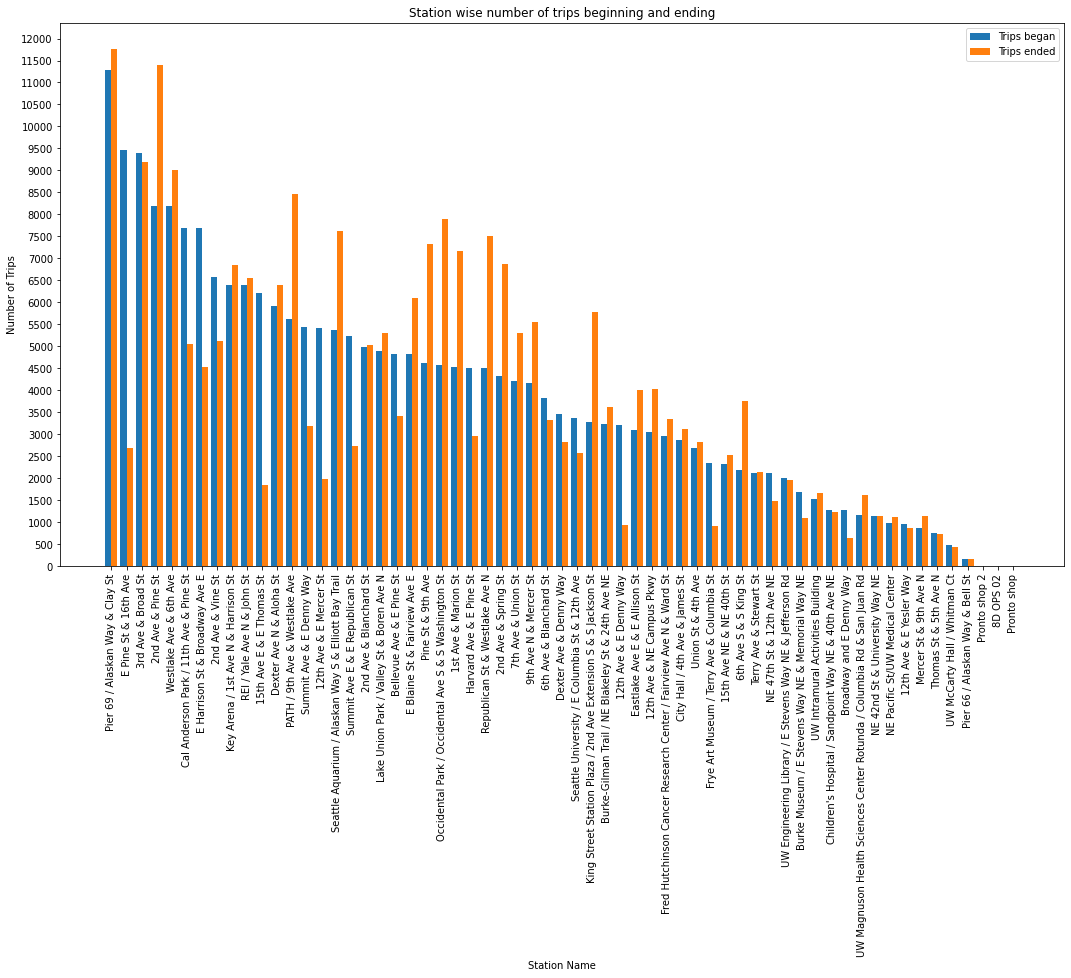

In [25]:
#Station wise number of trips beginning and ending
n=stations.shape[0]
x=np.arange(n)
plt.figure(figsize=(18,10))
nots=pd.Series(stations['number_of_trips_started'])
note=pd.Series(stations['number_of_trips_ended'])
stat=pd.Series(stations['station'])
plt.bar(x, stations.number_of_trips_started, 0.4)
plt.bar(x+0.4, stations.number_of_trips_ended, 0.4, label = 'Trips end')
plt.legend(['Trips began','Trips ended'])
plt.xticks(x+0.2, stations.station, rotation=90)
plt.yticks(np.arange(0, 12500, 500))
plt.xlabel("Station Name")
plt.ylabel("Number of Trips")
plt.title("Station wise number of trips beginning and ending")
plt.show()

In [26]:
#Monthly number of trips
year_monthly_trip=trip.groupby([trip['starttime'].dt.year.values, trip['starttime'].dt.month.values], as_index=False).size()
year_monthly_trip.rename({'level_0':'Year_Month','level_1':'Month','size':'Number_of_Trips'}, axis=1, inplace=True)
year_monthly_trip['Month'] = year_monthly_trip['Month'].apply(lambda x: calendar.month_abbr[x])
year_monthly_trip["Year_Month"] = year_monthly_trip["Month"].astype(str) + " - " + year_monthly_trip["Year_Month"].astype(str)
year_monthly_trip.drop('Month',  inplace=True, axis=1)
year_monthly_trip.head().style.hide_index()

Year_Month,Number_of_Trips
Jan - 2014,643
Feb - 2014,552
Mar - 2014,489
Apr - 2014,612
May - 2014,505


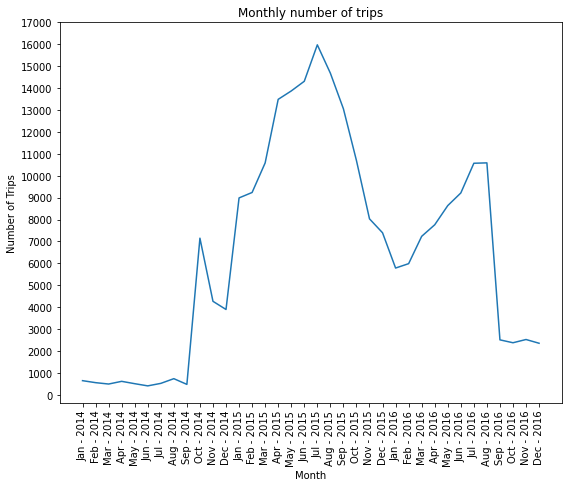

In [27]:
plt.figure(figsize=(9,7))
plt.plot(year_monthly_trip.Year_Month, year_monthly_trip.Number_of_Trips)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(year_monthly_trip.Number_of_Trips)+2000, 1000))
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly number of trips")
plt.show()

In [28]:
trip['gender'].value_counts()

Male      112940
Female     30330
Other       2901
Name: gender, dtype: int64

In [29]:
#Analysing number of trips by age
male_trips = trip[trip['gender']=='Male']
female_trips = trip[trip['gender']=='Female']
other_trips = trip[trip['gender']=='Other']
male_age_trip = male_trips.groupby(male_trips['age'], as_index=False).size()
female_age_trip = female_trips.groupby(female_trips['age'], as_index=False).size()
other_age_trip = other_trips.groupby(other_trips['age'], as_index=False).size()
other_age_trip.head()

,age,size
0,17,2
1,24,153
2,26,12
3,27,1
4,28,5


([<matplotlib.axis.XTick at 0x7f7ee7d45a90>,
 <a list of 21 Text major ticklabel objects>)

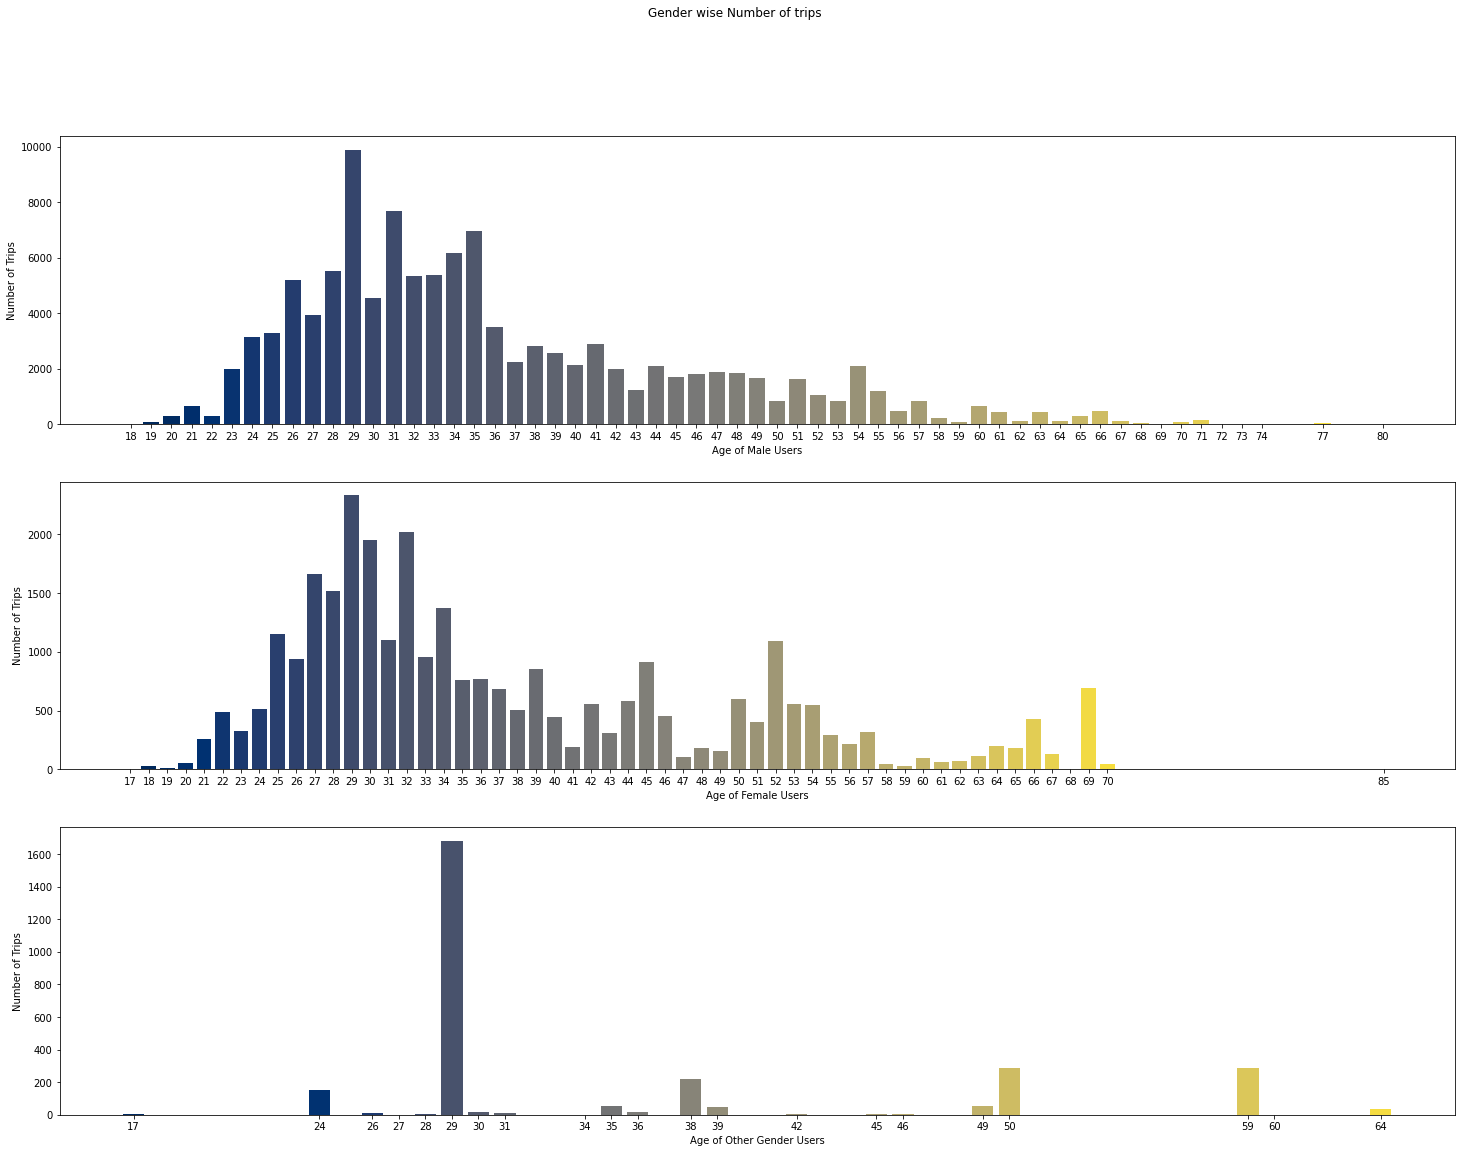

In [30]:
plt.figure(figsize=(25,18))
plt.suptitle("Gender wise Number of trips")
plt.subplot(3,1,1)
plt.bar(male_age_trip['age'], male_age_trip['size'], color=sns.color_palette("cividis",male_age_trip.shape[0]))
plt.xlabel("Age of Male Users")
plt.ylabel("Number of Trips")
plt.xticks(male_age_trip['age'])
plt.subplot(3,1,2)
plt.bar(female_age_trip['age'], female_age_trip['size'], color=sns.color_palette("cividis",female_age_trip.shape[0]))
plt.xlabel("Age of Female Users")
plt.ylabel("Number of Trips")
plt.xticks(female_age_trip['age'])
plt.subplot(3,1,3)
plt.bar(other_age_trip['age'], other_age_trip['size'], color=sns.color_palette("cividis",other_age_trip.shape[0]))
plt.xlabel("Age of Other Gender Users")
plt.ylabel("Number of Trips")
plt.xticks(other_age_trip['age'])

Text(31.902575231481478, 0.5, 'Number of Trips')

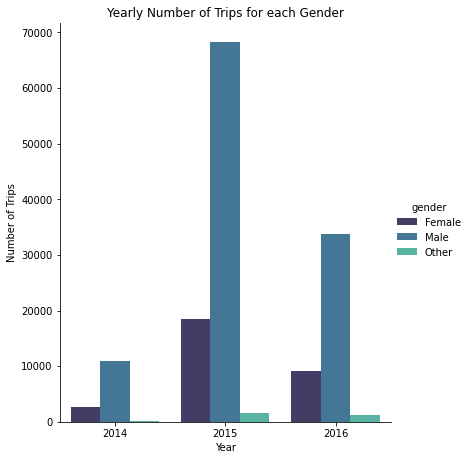

In [31]:
#Gender Analysis (Yearly)
yearly_gender = trip.groupby([trip['starttime'].dt.year, trip['gender']], as_index=False).size()
sns.catplot(x='starttime', y='size', hue='gender', data=yearly_gender, kind='bar', palette="mako", height=6.27, aspect=5.7/6.27)
plt.title('Yearly Number of Trips for each Gender')
plt.xlabel("Year")
plt.ylabel("Number of Trips")

Text(26.219649216524218, 0.5, 'Number of Trips')

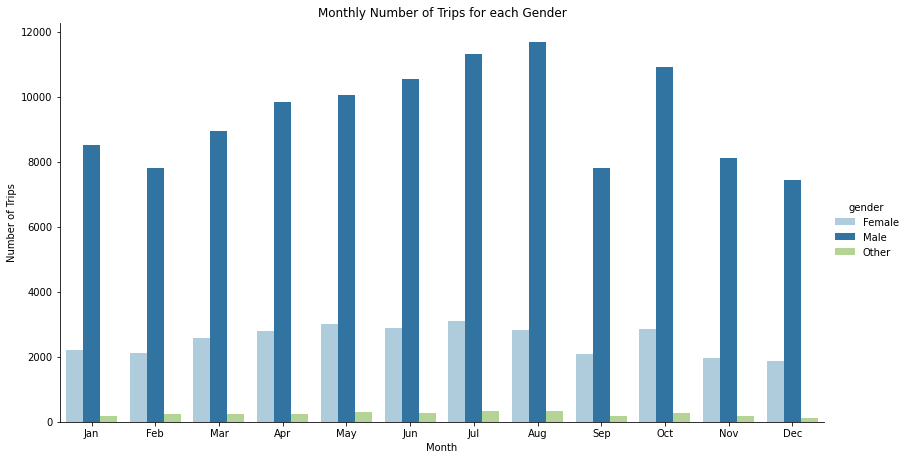

In [32]:
#Gender Analysis (Monthly)
monthly_gender = trip.groupby([trip['starttime'].dt.month, trip['gender']], as_index=False).size()
monthly_gender['starttime'] = monthly_gender['starttime'].apply(lambda x: calendar.month_abbr[x])
sns.catplot(x='starttime', y='size', hue='gender', data=monthly_gender, kind='bar', palette="Paired", height=6.27, aspect=11.7/6.27)
plt.title('Monthly Number of Trips for each Gender')
plt.xlabel("Month")
plt.ylabel("Number of Trips")

Text(29.051313356782117, 0.5, 'Number of Trips')

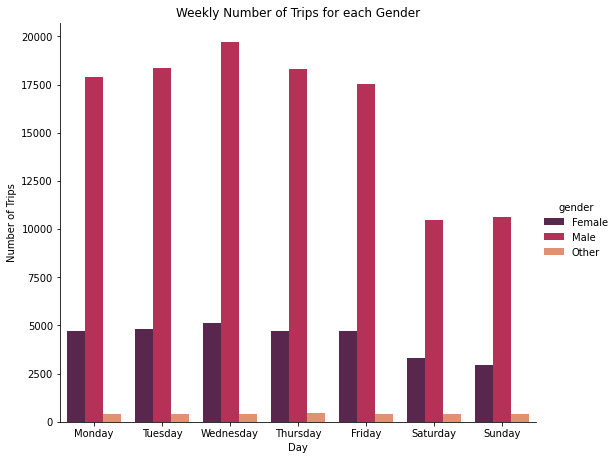

In [33]:
#Gender Analysis (Weekly)
daily_gender = trip.groupby([trip['starttime'].dt.weekday, trip['gender']], as_index=False).size()
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
daily_gender['starttime'] = daily_gender['starttime'].map(dayOfWeek)
sns.catplot(x='starttime', y='size', hue='gender', data=daily_gender, kind='bar', palette="rocket", height=6.27, aspect=7.7/6.27)
plt.title('Weekly Number of Trips for each Gender')
plt.xlabel("Day")
plt.ylabel("Number of Trips")

Text(23.862100346390548, 0.5, 'Number of Trips')

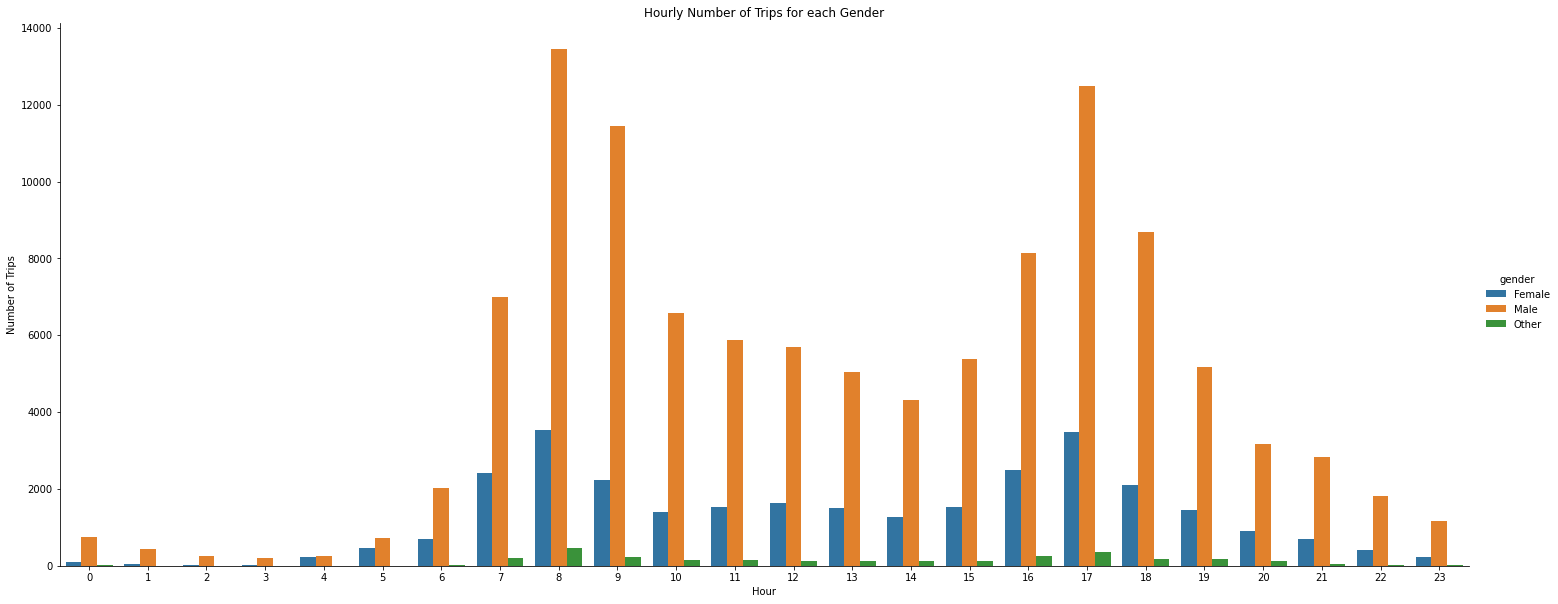

In [34]:
#Gender Analysis (Hourly)
hourly_gender = trip.groupby([trip['starttime'].dt.hour, trip['gender']], as_index=False).size()
sns.catplot(x='starttime', y='size', hue='gender', data=hourly_gender, kind='bar', palette="tab10", height=8.27, aspect=15.7/6.27)
plt.title('Hourly Number of Trips for each Gender')
plt.xlabel("Hour")
plt.ylabel("Number of Trips")

In [35]:
monthly_trip=trip.groupby(trip['starttime'].dt.month.values, as_index=False).size()
monthly_trip.rename({'index':'Month','size':'Number_of_Trips'}, axis=1, inplace=True)
monthly_trip['Month'] = monthly_trip['Month'].apply(lambda x: calendar.month_abbr[x])
monthly_trip.head().style.hide_index()

Month,Number_of_Trips
Jan,15415
Feb,15772
Mar,18306
Apr,21859
May,23011


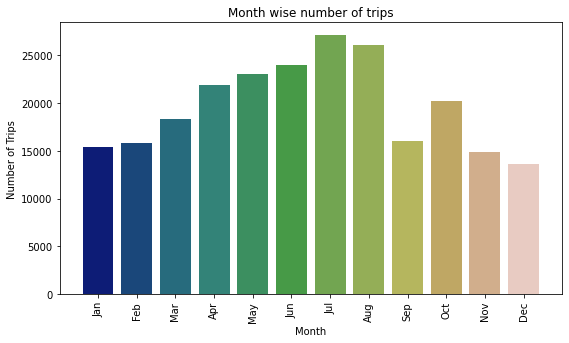

In [36]:
#Month (irrespective of year) number of trips
plt.figure(figsize=(9,5))
plt.bar(monthly_trip.Month, monthly_trip.Number_of_Trips, color=sns.color_palette("gist_earth",monthly_trip.shape[0]))
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Month wise number of trips")
plt.show()

In [37]:
#Hourly Analysis
hourly_trip=trip.groupby(trip['starttime'].dt.hour.values, as_index=False).size()
hourly_trip.rename({'index':'Hour','size':'Number_of_Trips'}, axis=1, inplace=True)
hourly_trip.head().style.hide_index()

Hour,Number_of_Trips
0,1540
1,985
2,721
3,398
4,619


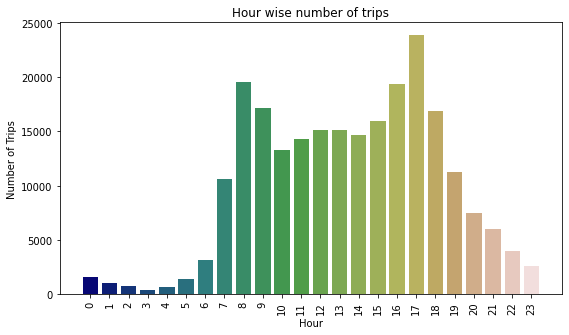

In [38]:
#Month (irresppective of year) number of trips
plt.figure(figsize=(9,5))
plt.bar(hourly_trip.Hour, hourly_trip.Number_of_Trips, color=sns.color_palette("gist_earth",hourly_trip.shape[0]))
plt.xticks(hourly_trip.Hour, rotation=90)
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.title("Hour wise number of trips")
plt.show()

In [39]:
age_trip=trip.groupby(trip['age'], as_index=False)['tripduration'].mean()
age_trip['tripduration']= age_trip['tripduration']/60
age_trip.sort_values(by='tripduration',ascending=False).head().style.hide_index()

age,tripduration
72,62.754000
85,30.292000
18,18.382411
73,15.522576
67,14.726404


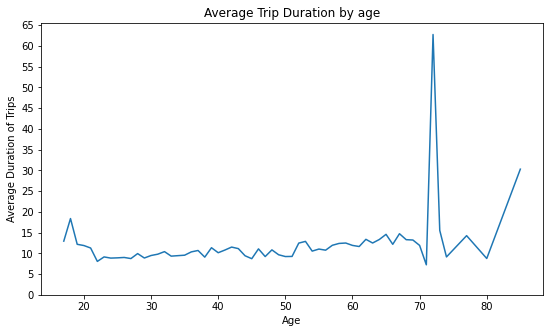

In [40]:
#Average Trip Duration by Age
plt.figure(figsize=(9,5))
plt.plot(age_trip.age, age_trip.tripduration)
plt.yticks(np.arange(0, 70, 5))
plt.xlabel("Age")
plt.ylabel("Average Duration of Trips")
plt.title("Average Trip Duration by age")
plt.show()

In [41]:
#Age Frequency
age_freq_trip=trip.groupby(trip['age'], as_index=False).size()
age_freq_trip.tail(5)

,age,size
56,73,11
57,74,2
58,77,40
59,80,7
60,85,1


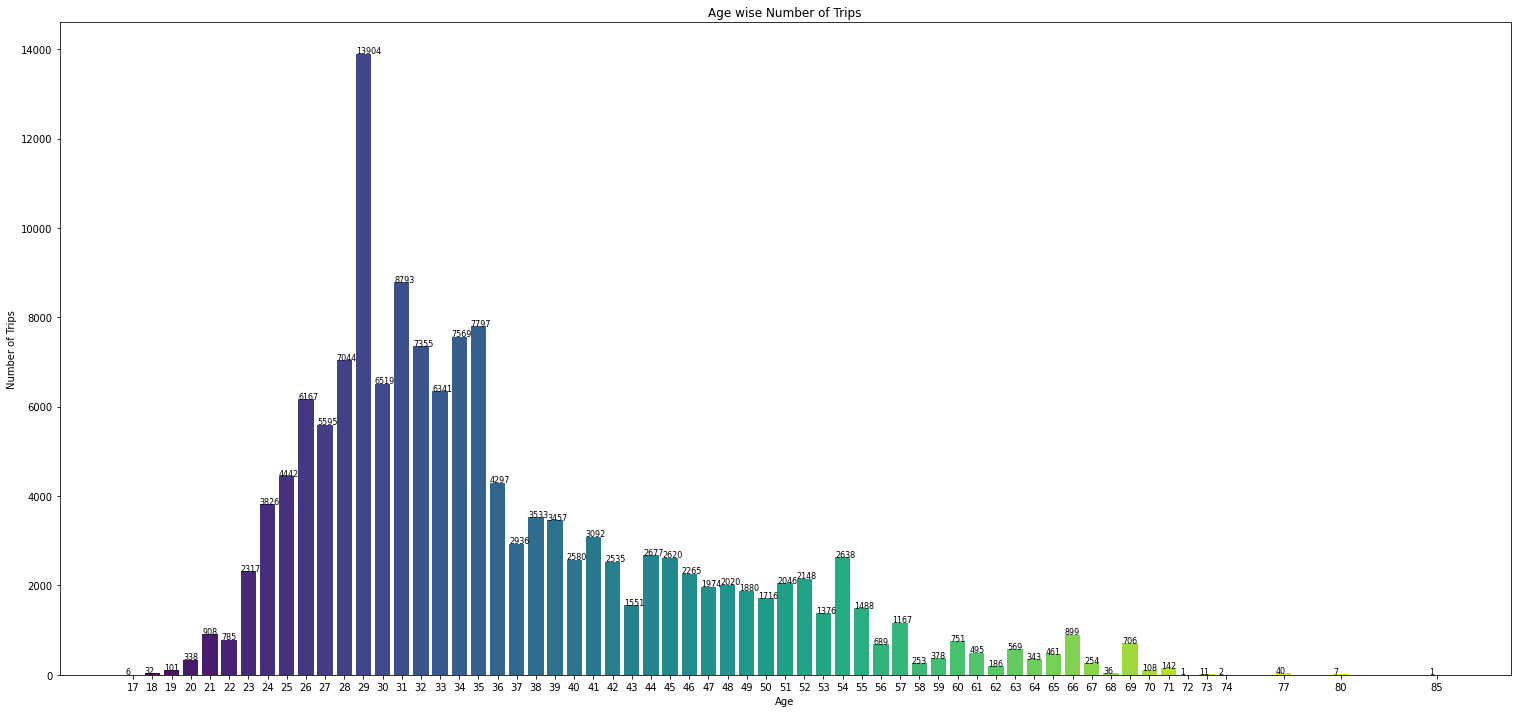

In [42]:
#Age wise Number of Trips
plt.figure(figsize=(26,12))
bars = plt.bar(age_freq_trip['age'], age_freq_trip['size'], color=sns.color_palette("viridis",age_freq_trip.shape[0]))
plt.xlabel("Age")
plt.ylabel("Number of Trips")
plt.title("Age wise Number of Trips")
plt.xticks(age_freq_trip['age'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+1, yval, fontsize=8)
plt.show()

In [43]:
#cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_trip=trip.groupby(trip['starttime'].dt.weekday, as_index=False).size()
weekday_trip['starttime'] = weekday_trip['starttime'].map(dayOfWeek)
weekday_trip

,starttime,size
0,Monday,35429
1,Tuesday,34595
2,Wednesday,35205
3,Thursday,35557
4,Friday,34225
5,Saturday,31796
6,Sunday,29259


Text(0.5, 1.0, 'Number of Trips by weekday')

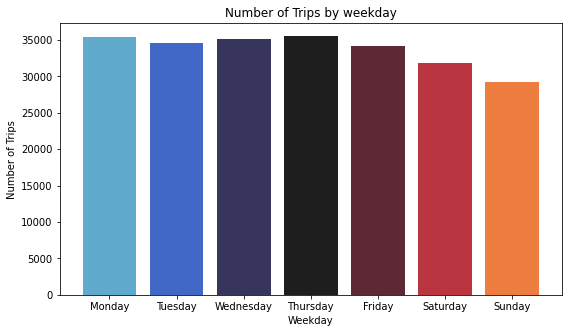

In [44]:
#Number of Trips by weekday
plt.figure(figsize=(9,5))
plt.bar(weekday_trip['starttime'], weekday_trip['size'], color=sns.color_palette("icefire",weekday_trip.shape[0]))
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by weekday")

In [45]:
from google.colab import files
uploaded = files.upload()

Saving station (1).csv to station (1).csv


In [46]:
station=pd.read_csv("station (1).csv")

In [47]:
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,13-10-2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,13-10-2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,13-10-2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,13-10-2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,13-10-2014,20,NaN,20,NaN


In [48]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [49]:
station['install_date'] = pd.to_datetime(station['install_date']).dt.date
station['modification_date'] = pd.to_datetime(station['modification_date']).dt.date
station['decommission_date'] = pd.to_datetime(station['decommission_date']).dt.date

In [50]:
station.isnull().sum()

station_id            0
name                  0
lat                   0
long                  0
install_date          0
install_dockcount     0
modification_date    41
current_dockcount     0
decommission_date    54
dtype: int64

In [51]:
station.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328207,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [52]:
station_date_data = station.groupby(station['install_date'], as_index=False)['name'].size() 
station_date_data.head()

,install_date,size
0,2014-10-13,50
1,2015-05-22,1
2,2015-07-27,1
3,2015-09-15,1
4,2015-10-29,1


In [53]:
station_date_data['size'].value_counts()

1     8
50    1
Name: size, dtype: int64

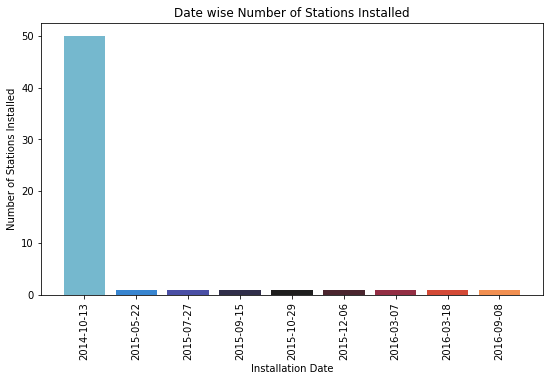

In [54]:
#Date wise Number of Stations Installed
plt.figure(figsize=(9,5))
plt.bar(x=station_date_data['install_date'].astype(str), height=station_date_data['size'],width=0.8, color=sns.color_palette("icefire",station_date_data.shape[0]))
plt.xticks(rotation=90)
plt.xlabel("Installation Date")
plt.ylabel("Number of Stations Installed")
plt.title("Date wise Number of Stations Installed")
plt.show()

In [55]:
station['change_in_dockcount'] = station['current_dockcount']-station['install_dockcount']
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,change_in_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,2014-10-13,18,NaT,18,NaT,0
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,2014-10-13,16,NaT,16,NaT,0
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,2014-10-13,16,NaT,16,NaT,0
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,2014-10-13,14,NaT,14,NaT,0
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,2014-10-13,20,NaT,20,NaT,0


In [56]:
station_dockcount = station[station.columns[[0,9]]]
station_dockcount = station_dockcount.sort_values('change_in_dockcount', ascending = False)
station_dockcount.head()

,station_id,change_in_dockcount
35,SLU-15,8
52,WF-01,6
23,EL-01,4
39,SLU-19,4
31,SLU-01,2


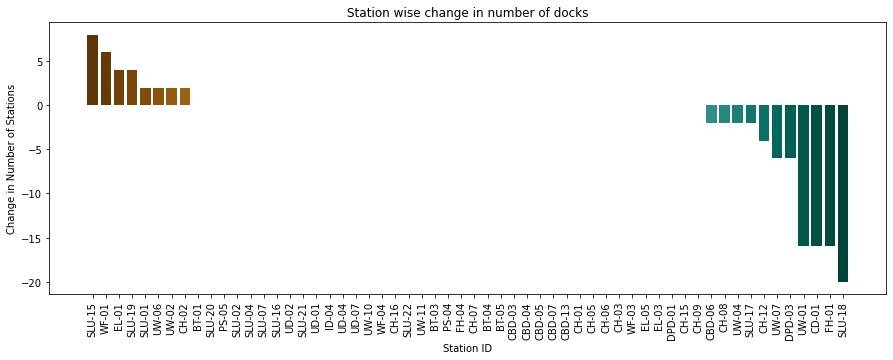

In [57]:
#Station wise change in number of docks
plt.figure(figsize=(15,5))
plt.bar(station_dockcount['station_id'], station_dockcount['change_in_dockcount'], color=sns.color_palette("BrBG",station_dockcount.shape[0]))
plt.xticks(rotation=90)
plt.xlabel("Station ID")
plt.ylabel("Change in Number of Stations")
plt.title("Station wise change in number of docks")
plt.show()

In [58]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [59]:
weather=pd.read_csv("weather.csv")

In [60]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
0,13-10-2014,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21.0,0.00,0,0,0,0
1,14-10-2014,63,59,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17.0,0.11,0,1,0,0
2,15-10-2014,62,58,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25.0,0.45,0,1,0,0
3,16-10-2014,71,61,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,NaN,0.00,0,1,0,0
4,17-10-2014,64,60,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,NaN,0.14,0,1,0,0


In [61]:
weather.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,279.000000,689.000000,689.00000,689.000000,689.000000,689.000000
mean,64.027576,56.582003,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,22.849462,0.105065,0.04209,0.448476,0.007257,0.010160
std,12.427843,10.400666,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,6.083258,0.235644,0.20094,0.497700,0.084939,0.100355
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,21.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,25.000000,0.090000,0.00000,1.000000,0.000000,0.000000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,52.000000,2.200000,1.00000,1.000000,1.000000,1.000000


In [62]:
weather.dtypes

Date                           object
Max_Temperature_F               int64
Mean_Temperature_F              int64
Min_TemperatureF                int64
Max_Dew_Point_F                 int64
MeanDew_Point_F                 int64
Min_Dewpoint_F                  int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_Pressure_In     float64
Mean_Sea_Level_Pressure_In    float64
Min_Sea_Level_Pressure_In     float64
Max_Visibility_Miles            int64
Mean_Visibility_Miles           int64
Min_Visibility_Miles            int64
Max_Wind_Speed_MPH              int64
Mean_Wind_Speed_MPH             int64
Max_Gust_Speed_MPH            float64
Precipitation_In              float64
Fog                             int64
Rain                            int64
Snow                            int64
Thunderstorm                    int64
dtype: object

In [63]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          689 non-null    int64  
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [64]:
weather.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,279.000000,689.000000,689.00000,689.000000,689.000000,689.000000
mean,64.027576,56.582003,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,22.849462,0.105065,0.04209,0.448476,0.007257,0.010160
std,12.427843,10.400666,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,6.083258,0.235644,0.20094,0.497700,0.084939,0.100355
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,21.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,25.000000,0.090000,0.00000,1.000000,0.000000,0.000000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,52.000000,2.200000,1.00000,1.000000,1.000000,1.000000


In [65]:
weather = weather.astype(dict.fromkeys(weather.columns[20:], bool))

In [66]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [67]:
weather['Max_Gust_Speed_MPH'] = weather['Max_Gust_Speed_MPH'].astype(float).astype('Int64')

Text(0.5, 1.0, 'Weekly Average Precipitation')

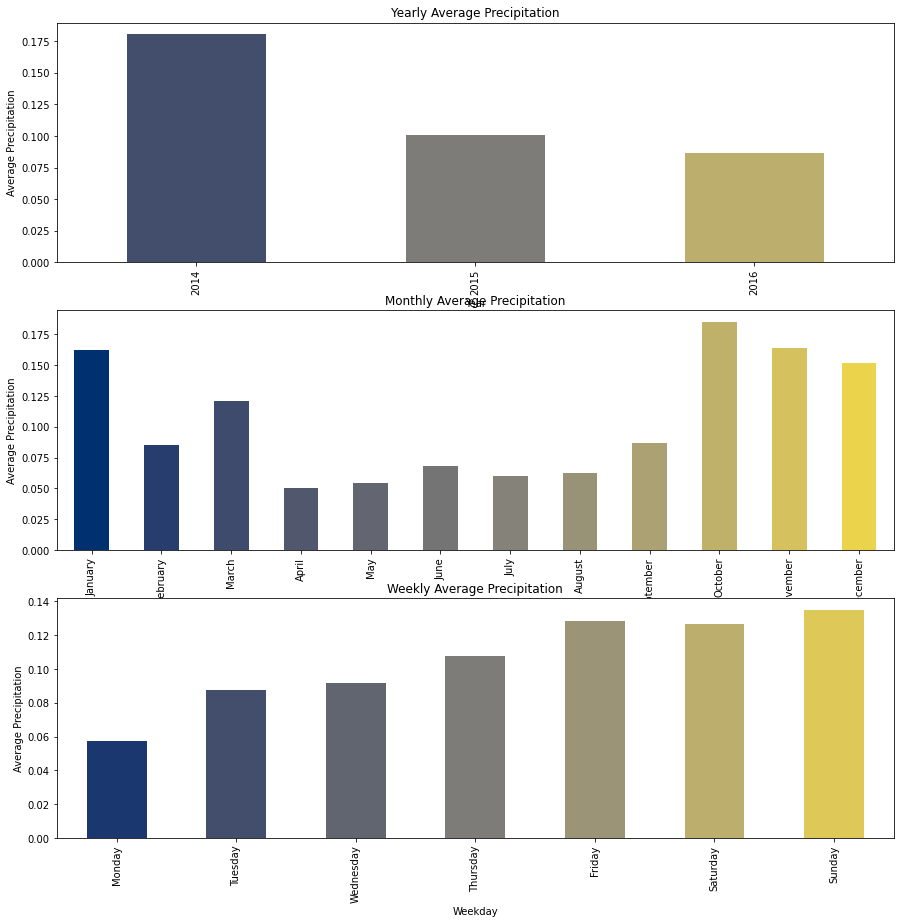

In [101]:
#Precipitation Analysis
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,15))
#Yearly Analysis
plt.subplot(3,1,1)
yearly_prec = weather.groupby(weather['Date'].dt.year)['Precipitation_In'].mean()
yearly_prec.plot.bar(color = sns.color_palette("cividis",yearly_prec.shape[0]))
plt.xlabel("Year")
plt.ylabel("Average Precipitation")
plt.title("Yearly Average Precipitation")
#Monthly Analysis
plt.subplot(3,1,2)
monthly_prec = weather.groupby([weather['Date'].dt.month_name()])['Precipitation_In'].mean()
monthly_prec = monthly_prec.reindex(new_order, axis=0)
monthly_prec.plot.bar(color= sns.color_palette("cividis",monthly_prec.shape[0]))
plt.xlabel("Month")
plt.ylabel("Average Precipitation")
plt.title("Monthly Average Precipitation")
#Weekday Analysis
plt.subplot(3,1,3)
daily_prec = weather.groupby(weather['Date'].dt.day_name())['Precipitation_In'].mean().reindex(cats)
daily_prec.plot.bar(color= sns.color_palette("cividis",daily_prec.shape[0]))
plt.xlabel("Weekday")
plt.ylabel("Average Precipitation")
plt.title("Weekly Average Precipitation")

In [90]:
monthly_prec.dtypes

Precipitation_In    float64
dtype: object

Text(0, 0.5, 'Number of times there was thunder')

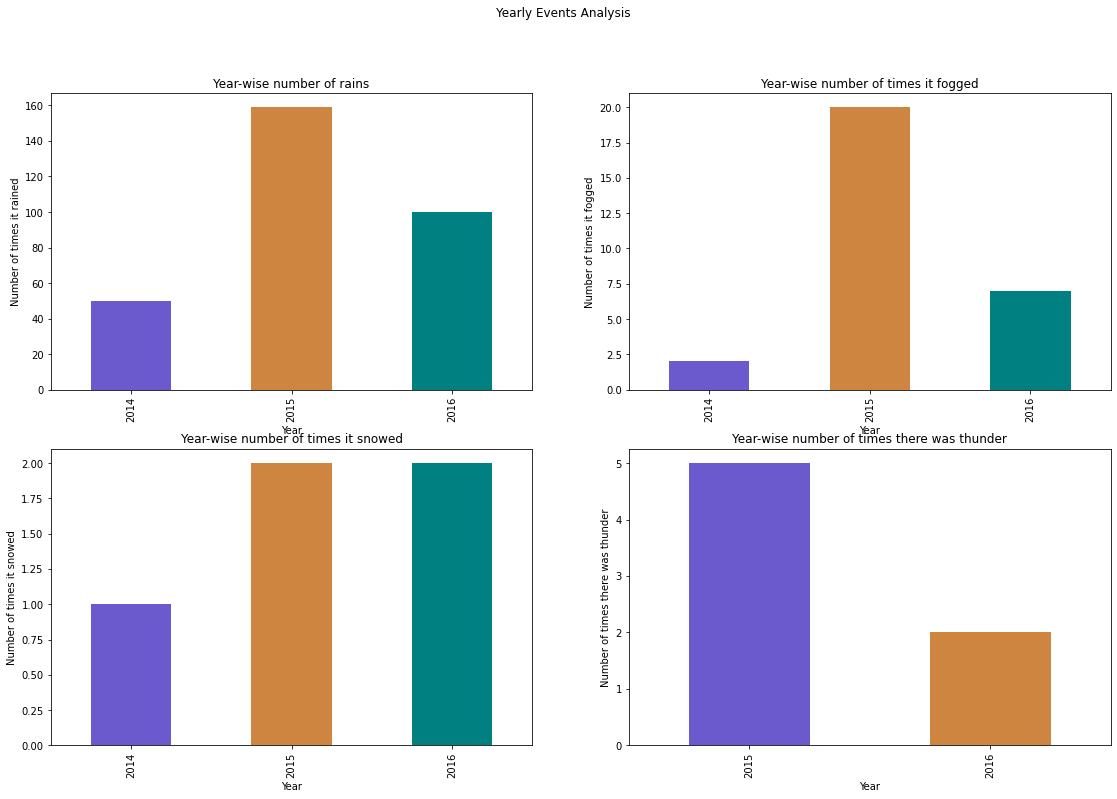

In [95]:
plt.figure(figsize=(19,12))
plt.suptitle("Yearly Events Analysis")
#Analysing Rain Pattern
plt.subplot(2,2,1)
rain = weather[weather['Rain']==1]
yearly_rain = rain.groupby(rain['Date'].dt.year).size()
yearly_rain.plot.bar(color = ['slateblue','peru','teal'])
plt.title("Year-wise number of rains")
plt.xlabel("Year")
plt.ylabel("Number of times it rained")
#Analysing Fog Pattern
plt.subplot(2,2,2)
fog = weather[weather['Fog']==1]
yearly_fog = fog.groupby(fog['Date'].dt.year).size()
yearly_fog.plot.bar(color = ['slateblue','peru','teal'])
plt.title("Year-wise number of times it fogged")
plt.xlabel("Year")
plt.ylabel("Number of times it fogged")
#Analysing Snow Pattern
plt.subplot(2,2,3)
snow = weather[weather['Snow']==1]
yearly_snow = snow.groupby(snow['Date'].dt.year).size()
yearly_snow.plot.bar(color = ['slateblue','peru','teal'])
plt.title("Year-wise number of times it snowed")
plt.xlabel("Year")
plt.ylabel("Number of times it snowed")
#Analysing Thunderstorm Pattern
plt.subplot(2,2,4)
thunderstorm = weather[weather['Thunderstorm']==1]
yearly_thunderstorm = thunderstorm.groupby(thunderstorm['Date'].dt.year).size()
yearly_thunderstorm.plot.bar(color = ['slateblue','peru','teal'])
plt.title("Year-wise number of times there was thunder")
plt.xlabel("Year")
plt.ylabel("Number of times there was thunder")

Text(0, 0.5, 'Number of times there was thunder')

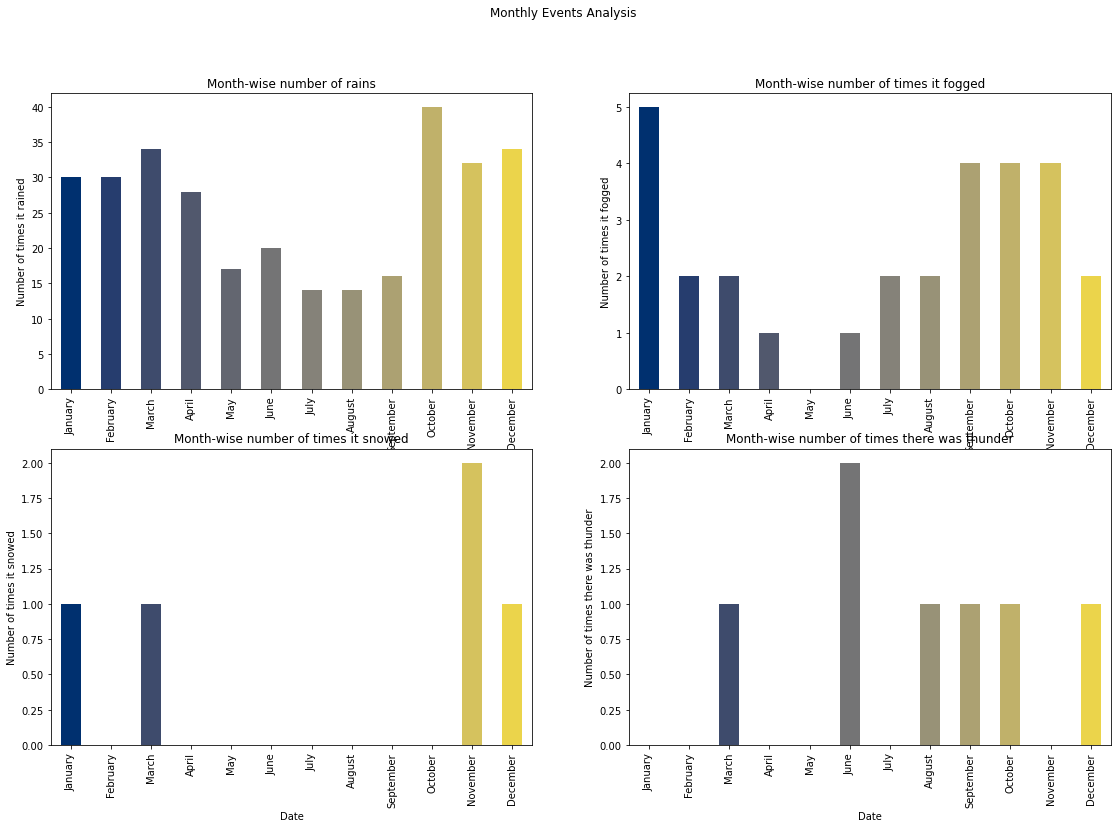

In [97]:
plt.figure(figsize=(19,12))
plt.suptitle("Monthly Events Analysis")
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Analysing Rain Pattern
plt.subplot(2,2,1)
monthly_rain = rain.groupby(rain['Date'].dt.month_name()).size()
monthly_rain = monthly_rain.reindex(new_order, axis=0)
monthly_rain.plot.bar(color= sns.color_palette("cividis",monthly_rain.shape[0]))
plt.title("Month-wise number of rains")
plt.ylabel("Number of times it rained")
#Analysing Fog Pattern
plt.subplot(2,2,2)
monthly_fog = fog.groupby(fog['Date'].dt.month_name()).size()
monthly_fog = monthly_fog.reindex(new_order, axis=0)
monthly_fog.plot.bar(color= sns.color_palette("cividis",monthly_fog.shape[0]))
plt.title("Month-wise number of times it fogged")
plt.ylabel("Number of times it fogged")
#Analysing Snow Pattern
plt.subplot(2,2,3)
monthly_snow = snow.groupby(snow['Date'].dt.month_name()).size()
monthly_snow = monthly_snow.reindex(new_order, axis=0)
monthly_snow.plot.bar(color= sns.color_palette("cividis",monthly_snow.shape[0]))
plt.title("Month-wise number of times it snowed")
plt.ylabel("Number of times it snowed")
#Analysing Thunderstorm Pattern
plt.subplot(2,2,4)
monthly_thunderstorm = thunderstorm.groupby(thunderstorm['Date'].dt.month_name()).size()
monthly_thunderstorm = monthly_thunderstorm.reindex(new_order, axis=0)
monthly_thunderstorm.plot.bar(color = sns.color_palette("cividis",monthly_thunderstorm.shape[0]))
plt.title("Month-wise number of times there was thunder")
plt.ylabel("Number of times there was thunder")

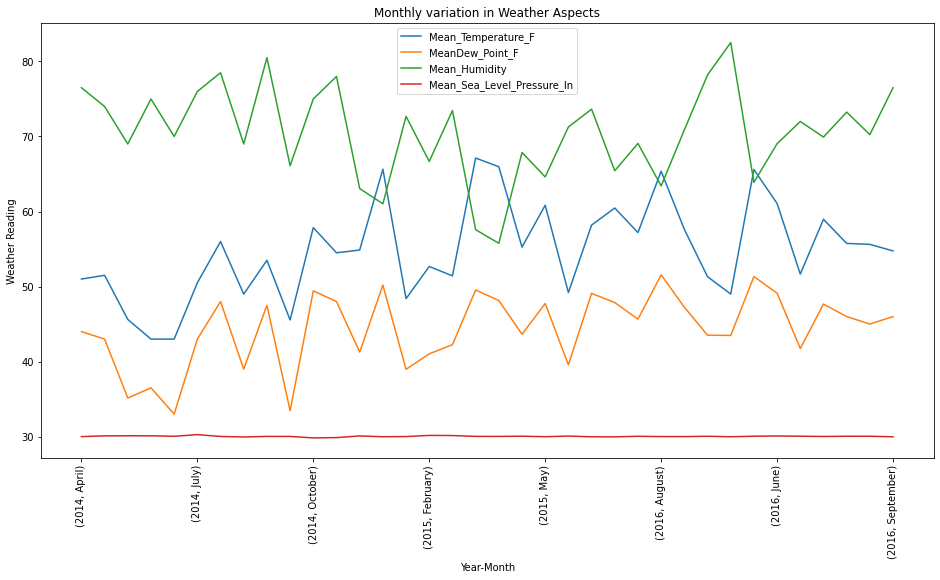

In [102]:
#Monthly variation in Weather Aspects
data = weather.iloc[:, 0:13]
plt.figure(figsize=(16,8))
monthly_mean_temp = data.groupby([data.Date.dt.year, data.Date.dt.month_name()])['Mean_Temperature_F'].mean()
#plt.subplot(2,2,1)
monthly_mean_temp.plot.line()
monthly_mean_dew = data.groupby([data.Date.dt.year, data.Date.dt.month_name()])['MeanDew_Point_F'].mean()
#plt.subplot(2,2,2)
monthly_mean_dew.plot.line()
monthly_mean_humidity = data.groupby([data.Date.dt.year, data.Date.dt.month_name()])['Mean_Humidity'].mean()
#plt.subplot(2,2,3)
monthly_mean_humidity.plot.line()
monthly_mean_pressure = data.groupby([data.Date.dt.year, data.Date.dt.month_name()])['Mean_Sea_Level_Pressure_In'].mean()
#plt.subplot(2,2,4)
monthly_mean_pressure.plot.line()
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Weather Reading")
plt.title("Monthly variation in Weather Aspects")
plt.legend()
plt.show()

# **Merging Dataframe**

In [103]:
trip.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
age                           Int64
dtype: object

In [104]:
weather.dtypes

Date                          datetime64[ns]
Max_Temperature_F                      int64
Mean_Temperature_F                     int64
Min_TemperatureF                       int64
Max_Dew_Point_F                        int64
MeanDew_Point_F                        int64
Min_Dewpoint_F                         int64
Max_Humidity                           int64
Mean_Humidity                          int64
Min_Humidity                           int64
Max_Sea_Level_Pressure_In            float64
Mean_Sea_Level_Pressure_In           float64
Min_Sea_Level_Pressure_In            float64
Max_Visibility_Miles                   int64
Mean_Visibility_Miles                  int64
Min_Visibility_Miles                   int64
Max_Wind_Speed_MPH                     int64
Mean_Wind_Speed_MPH                    int64
Max_Gust_Speed_MPH                     Int64
Precipitation_In                     float64
Fog                                     bool
Rain                                    bool
Snow      

In [105]:
station.dtypes

station_id              object
name                    object
lat                    float64
long                   float64
install_date            object
install_dockcount        int64
modification_date       object
current_dockcount        int64
decommission_date       object
change_in_dockcount      int64
dtype: object

In [132]:
merged = pd.merge(trip, station[['station_id','lat','long']], left_on='from_station_id', right_on='station_id', how='inner')
merged.rename(columns={'lat':'lat_x', 'long':'long_x'}, inplace = True)
merged.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,station_id,lat_x,long_x
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,56,CBD-06,47.60595,-122.335768
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46,CBD-06,47.60595,-122.335768
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,28,CBD-06,47.60595,-122.335768
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,39,CBD-06,47.60595,-122.335768
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,45,CBD-06,47.60595,-122.335768


In [133]:
merged = pd.merge(merged, station[['station_id','lat','long']], left_on='to_station_id', right_on='station_id', how='inner')
merged.rename(columns={'lat':'lat_y', 'long':'long_y'}, inplace = True)
merged.drop(['station_id_x','station_id_y'], axis=1, inplace=True)
merged.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,lat_x,long_x,lat_y,long_y
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,56,47.60595,-122.335768,47.600757,-122.332946
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46,47.60595,-122.335768,47.600757,-122.332946
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,28,47.60595,-122.335768,47.600757,-122.332946
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,39,47.60595,-122.335768,47.600757,-122.332946
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,45,47.60595,-122.335768,47.600757,-122.332946


In [134]:
merged = pd.merge(merged, weather, left_on=merged['starttime'].dt.date, right_on=weather['Date'].dt.date, how='inner')
merged.drop(['key_0','Date'], axis=1, inplace=True)

In [135]:
merged

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,lat_x,long_x,lat_y,long_y,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,56,47.605950,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,False,False,False,False
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46,47.605950,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,False,False,False,False
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,28,47.605950,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,False,False,False,False
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,39,47.605950,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,False,False,False,False
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,45,47.605950,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236040,244452,2016-07-08 13:05:00,2016-07-08 16:38:00,SEA00386,12775.59,NE Pacific St/UW Medical Center,NE Pacific St/UW Medical Center,UW-11,UW-11,Short-Term Pass Holder,NaN,<NA>,47.649952,-122.306263,47.649952,-122.306263,72,66,60,56,52,49,83,69,49,29.96,29.92,29.89,10,10,10,9,4,<NA>,0.03,False,True,False,False
236041,244454,2016-07-08 13:07:00,2016-07-08 16:37:00,SEA00102,12653.29,NE Pacific St/UW Medical Center,NE Pacific St/UW Medical Center,UW-11,UW-11,Short-Term Pass Holder,NaN,<NA>,47.649952,-122.306263,47.649952,-122.306263,72,66,60,56,52,49,83,69,49,29.96,29.92,29.89,10,10,10,9,4,<NA>,0.03,False,True,False,False
236042,244523,2016-07-08 14:52:00,2016-07-08 15:03:00,SEA00220,660.07,NE Pacific St/UW Medical Center,NE Pacific St/UW Medical Center,UW-11,UW-11,Short-Term Pass Holder,NaN,<NA>,47.649952,-122.306263,47.649952,-122.306263,72,66,60,56,52,49,83,69,49,29.96,29.92,29.89,10,10,10,9,4,<NA>,0.03,False,True,False,False
236043,244571,2016-07-08 16:31:00,2016-07-08 16:55:00,SEA00125,1449.44,NE Pacific St/UW Medical Center,NE Pacific St/UW Medical Center,UW-11,UW-11,Short-Term Pass Holder,NaN,<NA>,47.649952,-122.306263,47.649952,-122.306263,72,66,60,56,52,49,83,69,49,29.96,29.92,29.89,10,10,10,9,4,<NA>,0.03,False,True,False,False


In [136]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236045 entries, 0 to 236044
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     236045 non-null  int64         
 1   starttime                   236045 non-null  datetime64[ns]
 2   stoptime                    236045 non-null  datetime64[ns]
 3   bikeid                      236045 non-null  object        
 4   tripduration                236045 non-null  float64       
 5   from_station_name           236045 non-null  object        
 6   to_station_name             236045 non-null  object        
 7   from_station_id             236045 non-null  object        
 8   to_station_id               236045 non-null  object        
 9   usertype                    236044 non-null  object        
 10  gender                      146156 non-null  object        
 11  age                         146152 non-

In [110]:
merged.describe()

,trip_id,tripduration,age,lat_x,long_x,lat_y,long_y,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In
count,236045.000000,236045.000000,146152.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,236045.000000,88505.000000,236045.000000
mean,130059.468711,1202.739065,36.119800,47.620419,-122.330959,47.619727,-122.333187,68.438357,60.095791,52.185181,50.037188,46.634332,42.455062,82.001118,64.610917,45.345870,30.116351,30.041773,29.958610,9.996827,9.622551,7.940778,10.626834,4.300570,21.287430,0.058301
std,72842.485339,2066.787310,10.153778,0.014335,0.013894,0.015255,0.012957,12.184425,10.086782,9.038624,6.896977,7.286088,8.348880,9.813218,12.550137,15.019556,0.161910,0.168292,0.184388,0.149003,0.961332,3.035560,3.321712,2.433753,5.169369,0.159734
min,431.000000,60.010000,17.000000,47.598488,-122.355230,47.598488,-122.355230,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.000000,16.000000,0.000000
25%,67743.000000,392.280000,29.000000,47.613628,-122.339641,47.610185,-122.341102,59.000000,52.000000,46.000000,46.000000,43.000000,38.000000,75.000000,56.000000,34.000000,30.010000,29.940000,29.870000,10.000000,10.000000,6.000000,8.000000,3.000000,18.000000,0.000000
50%,130529.000000,633.250000,33.000000,47.618285,-122.332447,47.615829,-122.335768,68.000000,60.000000,54.000000,51.000000,48.000000,44.000000,83.000000,65.000000,44.000000,30.100000,30.040000,29.970000,10.000000,10.000000,10.000000,10.000000,4.000000,20.000000,0.000000
75%,192899.000000,1145.070000,41.000000,47.623165,-122.321251,47.623165,-122.326412,78.000000,68.000000,59.000000,55.000000,52.000000,48.000000,89.000000,74.000000,57.000000,30.220000,30.140000,30.070000,10.000000,10.000000,10.000000,12.000000,6.000000,24.000000,0.020000
max,255245.000000,28794.400000,85.000000,47.666145,-122.284119,47.666145,-122.284119,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.000000,52.000000,2.200000


In [137]:
merged.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,lat_x,long_x,lat_y,long_y,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,56,47.60595,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,False,False,False,False
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.38,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46,47.60595,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,False,False,False,False
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.83,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,28,47.60595,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,False,False,False,False
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.94,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,39,47.60595,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,False,False,False,False
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.92,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,45,47.60595,-122.335768,47.600757,-122.332946,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,False,False,False,False


# **Weather Analysis**

In [184]:
#Analyse number of trips by Weather Variations
merged2 = merged.groupby(merged['starttime'].dt.date, as_index=False).size()
merged2['starttime'] = pd.to_datetime(merged2['starttime'])
weather_trip = pd.merge(weather, merged2, left_on='Date', right_on='starttime', how='inner')
merged2

,starttime,size
0,2014-01-11,438
1,2014-01-12,205
2,2014-02-11,331
3,2014-02-12,221
4,2014-03-11,237
...,...,...
684,2016-12-04,203
685,2016-12-05,392
686,2016-12-06,365
687,2016-12-07,429


In [185]:
weather_trip.dtypes

Date                          datetime64[ns]
Max_Temperature_F                      int64
Mean_Temperature_F                     int64
Min_TemperatureF                       int64
Max_Dew_Point_F                        int64
MeanDew_Point_F                        int64
Min_Dewpoint_F                         int64
Max_Humidity                           int64
Mean_Humidity                          int64
Min_Humidity                           int64
Max_Sea_Level_Pressure_In            float64
Mean_Sea_Level_Pressure_In           float64
Min_Sea_Level_Pressure_In            float64
Max_Visibility_Miles                   int64
Mean_Visibility_Miles                  int64
Min_Visibility_Miles                   int64
Max_Wind_Speed_MPH                     int64
Mean_Wind_Speed_MPH                    int64
Max_Gust_Speed_MPH                     Int64
Precipitation_In                     float64
Fog                                     bool
Rain                                    bool
Snow      

In [186]:
weather_trip = weather_trip[['Date','size','Mean_Temperature_F','MeanDew_Point_F','Mean_Humidity','Mean_Sea_Level_Pressure_In','Mean_Visibility_Miles','Mean_Wind_Speed_MPH','Precipitation_In','Fog','Rain','Snow','Thunderstorm']]

In [187]:
weather_trip.dtypes

Date                          datetime64[ns]
size                                   int64
Mean_Temperature_F                     int64
MeanDew_Point_F                        int64
Mean_Humidity                          int64
Mean_Sea_Level_Pressure_In           float64
Mean_Visibility_Miles                  int64
Mean_Wind_Speed_MPH                    int64
Precipitation_In                     float64
Fog                                     bool
Rain                                    bool
Snow                                    bool
Thunderstorm                            bool
dtype: object

In [188]:
weather_trip.head()

,Date,size,Mean_Temperature_F,MeanDew_Point_F,Mean_Humidity,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Fog,Rain,Snow,Thunderstorm
0,2014-10-13,409,62,51,68,29.79,10,4,0.00,False,False,False,False
1,2014-10-14,491,59,51,78,29.75,9,5,0.11,False,True,False,False
2,2014-10-15,313,58,50,77,29.71,9,7,0.45,False,True,False,False
3,2014-10-16,395,61,46,61,29.95,10,4,0.00,False,True,False,False
4,2014-10-17,294,60,51,72,29.78,10,3,0.14,False,True,False,False


Text(0, 0.5, 'Number of Trips')

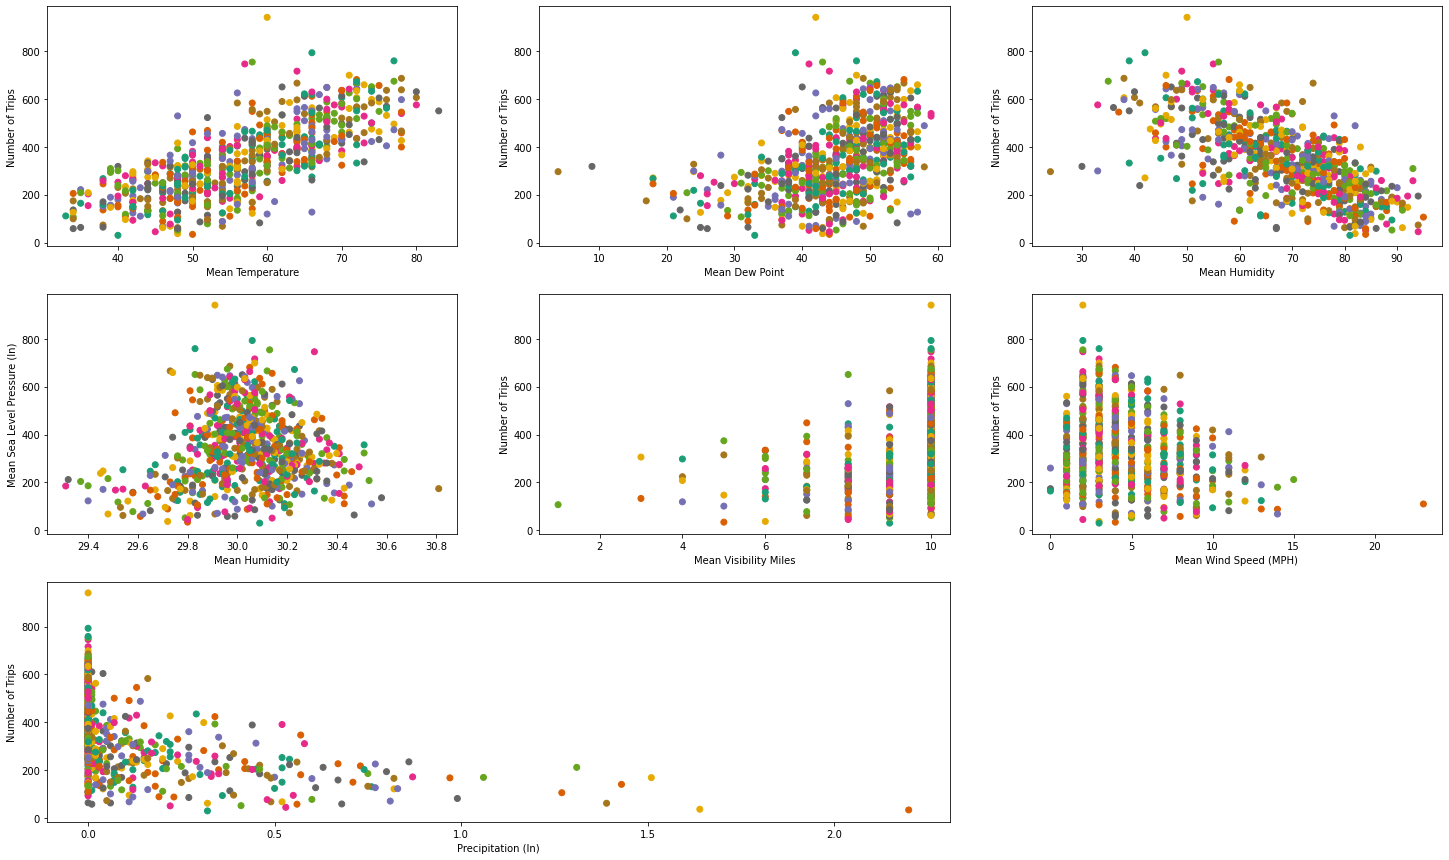

In [212]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
plt.scatter(weather_trip['Mean_Temperature_F'], weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Temperature")
plt.ylabel("Number of Trips")
plt.subplot(3,3,2)
plt.scatter(weather_trip['MeanDew_Point_F'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Dew Point")
plt.ylabel("Number of Trips")
plt.subplot(3,3,3)
plt.scatter(weather_trip['Mean_Humidity'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Humidity")
plt.ylabel("Number of Trips")
plt.subplot(3,3,4)
plt.scatter(weather_trip['Mean_Sea_Level_Pressure_In'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Humidity")
plt.ylabel("Mean Sea Level Pressure (In)")
plt.subplot(3,3,5)
plt.scatter(weather_trip['Mean_Visibility_Miles'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Visibility Miles")
plt.ylabel("Number of Trips")
plt.subplot(3,3,6)
plt.scatter(weather_trip['Mean_Wind_Speed_MPH'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Mean Wind Speed (MPH)")
plt.ylabel("Number of Trips")
plt.subplot(3,3,(7,8))
plt.scatter(weather_trip['Precipitation_In'],weather_trip['size'], color=sns.color_palette("Dark2",weather_trip.shape[0]))
plt.xlabel("Precipitation (In)")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Number of Trips')

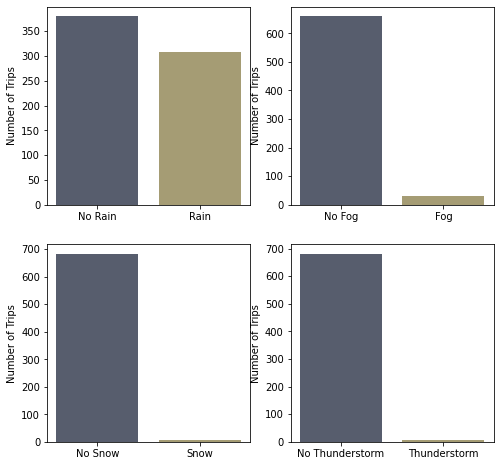

In [232]:
plt.figure(figsize=(8,8))
rain_group = weather_trip.groupby('Rain', as_index=False).size()
rain_group['Rain'] = rain_group['Rain'].map({False:'No Rain', True:'Rain'})
plt.subplot(2,2,1)
plt.bar(rain_group['Rain'],rain_group['size'], color=sns.color_palette("cividis", rain_group.shape[0]))
plt.ylabel("Number of Trips")

fog_group = weather_trip.groupby('Fog', as_index=False).size()
fog_group['Fog'] = fog_group['Fog'].map({False:'No Fog', True:'Fog'})
plt.subplot(2,2,2)
plt.bar(fog_group['Fog'],fog_group['size'], color=sns.color_palette("cividis", fog_group.shape[0]))
plt.ylabel("Number of Trips")

snow_group = weather_trip.groupby('Snow', as_index=False).size()
snow_group['Snow'] = snow_group['Snow'].map({False:'No Snow', True:'Snow'})
plt.subplot(2,2,3)
plt.bar(snow_group['Snow'],snow_group['size'], color=sns.color_palette("cividis", snow_group.shape[0]))
plt.ylabel("Number of Trips")

thunderstorm_group = weather_trip.groupby('Thunderstorm', as_index=False).size()
thunderstorm_group['Thunderstorm'] = thunderstorm_group['Thunderstorm'].map({False:'No Thunderstorm', True:'Thunderstorm'})
plt.subplot(2,2,4)
plt.bar(thunderstorm_group['Thunderstorm'],thunderstorm_group['size'], color=sns.color_palette("cividis", thunderstorm_group.shape[0]))
plt.ylabel("Number of Trips")